In [7]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import pandas as pd
import plotnine as p9
from IPython.display import display

pd.options.display.max_columns = None

## Dane w tabeli

In [9]:
dane=pd.read_csv("beauty.csv")
print(len(dane))

piekno = "btystdave"
ocena = "courseevaluation"
display(dane.sort_values(piekno,ascending=False).head(400))

463


,tenured,profnumber,minority,age,beautyf2upper,beautyflowerdiv,beautyfupperdiv,beautym2upper,beautymlowerdiv,beautymupperdiv,btystdave,btystdf2u,btystdfl,btystdfu,btystdm2u,btystdml,btystdmu,class1,class2,class3,class4,class5,class6,class7,class8,class9,class10,class11,class12,class13,class14,class15,class16,class17,class18,class19,class20,class21,class22,class23,class24,class25,class26,class27,class28,class29,class30,courseevaluation,didevaluation,female,formal,fulldept,lower,multipleclass,nonenglish,onecredit,percentevaluating,profevaluation,students,tenuretrack,blkandwhite,btystdvariance,btystdavepos,btystdaveneg
279,0,43,0,39,8,8,8,9,7,9,1.881674,1.243706,2.052527,1.360087,2.495334,2.037647,2.100744,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.6,20,1,0,1,0,0,0,0,86.95652,4.6,23,0,0,1.157145,1.88167,0.000000
42,0,43,0,39,8,8,8,9,7,9,1.881674,1.243706,2.052527,1.360087,2.495334,2.037647,2.100744,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3.4,22,1,0,1,1,1,0,0,91.66666,3.3,24,0,0,1.157145,1.88167,0.000000
278,0,43,0,39,8,8,8,9,7,9,1.881674,1.243706,2.052527,1.360087,2.495334,2.037647,2.100744,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.7,18,1,0,1,0,0,0,0,78.26087,4.7,23,0,0,1.157145,1.88167,0.000000
280,0,43,0,39,8,8,8,9,7,9,1.881674,1.243706,2.052527,1.360087,2.495334,2.037647,2.100744,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3.6,27,1,0,1,1,1,0,0,96.42857,3.6,28,0,0,1.157145,1.88167,0.000000
209,0,25,0,34,8,8,9,8,6,8,1.687167,1.243706,2.052527,1.844361,1.890795,1.450104,1.641512,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.9,33,1,0,1,0,0,0,0,82.50000,4.1,40,1,0,0.454603,1.68717,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1,79,0,57,3,3,4,3,2,3,-0.835137,-1.142179,-0.605015,-0.577006,-1.131904,-0.900065,-0.654651,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.5,53,0,0,1,0,0,0,0,54.08163,3.5,98,1,0,0.338724,0.00000,-0.835137
412,1,82,0,57,3,2,3,6,2,1,-0.855241,-1.142179,-1.136523,-1.061280,0.681715,-0.900065,-1.573116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.6,16,0,0,1,1,0,0,0,84.21053,3.4,19,1,1,3.083493,0.00000,-0.855241
413,1,82,0,57,3,2,3,6,2,1,-0.855241,-1.142179,-1.136523,-1.061280,0.681715,-0.900065,-1.573116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.8,12,0,0,1,1,0,0,0,75.00000,3.9,16,1,1,3.083493,0.00000,-0.855241
414,1,82,0,57,3,2,3,6,2,1,-0.855241,-1.142179,-1.136523,-1.061280,0.681715,-0.900065,-1.573116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.7,14,0,0,1,1,0,0,0,87.50000,3.8,16,1,1,3.083493,0.00000,-0.855241


In [16]:
results = smf.ols(ocena +"~" +piekno, data=dane).fit()
wyn=results.params

fig1=(p9.ggplot(p9.aes(x=piekno,y=ocena),data=dane)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn[piekno])))

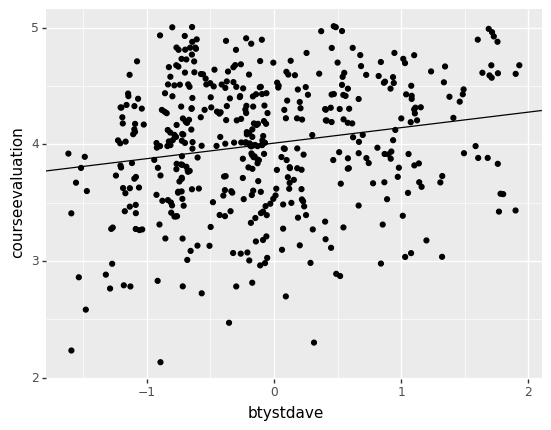

<ggplot: (8764355872839)>

In [17]:
fig1

## Wizualizacja regresjii z najmniejszą wartością  sumy residuów oraz samych resiuduów

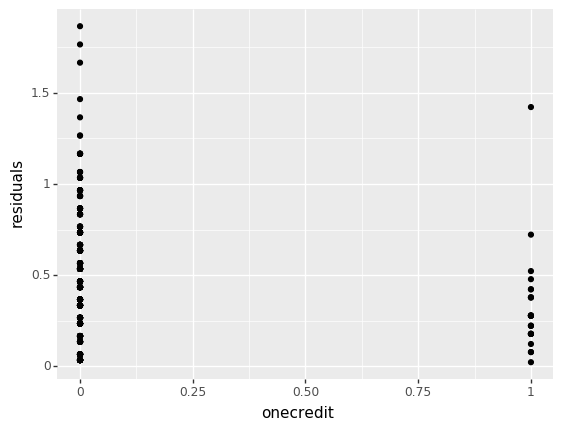

<ggplot: (8745940615716)>

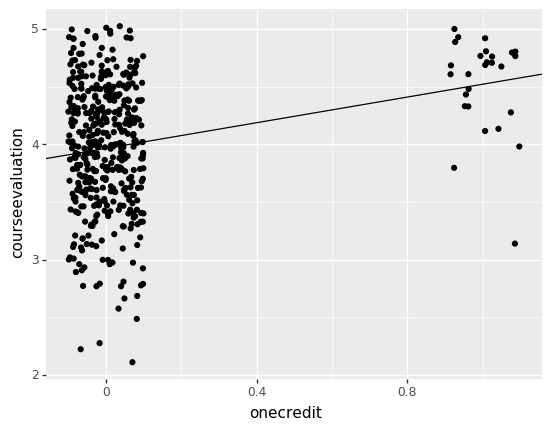

<ggplot: (8745940367066)>

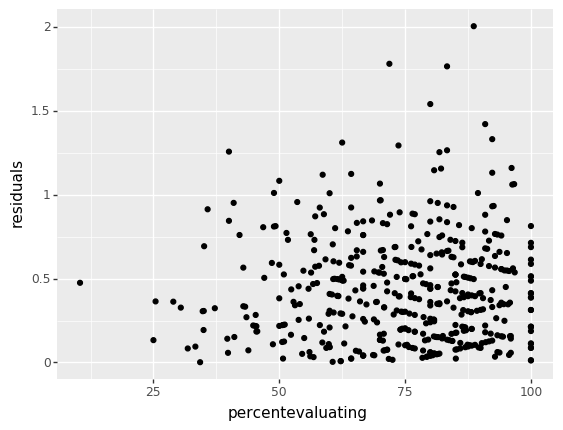

<ggplot: (8745940662476)>

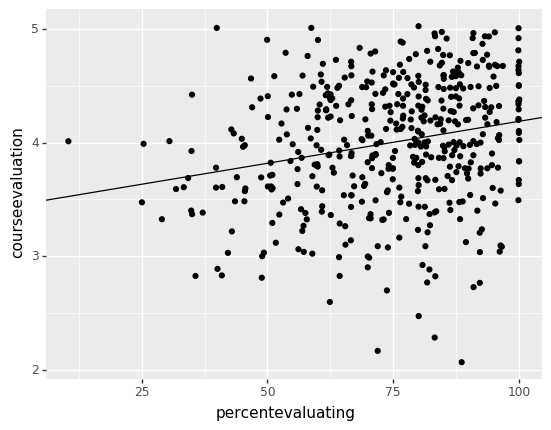

<ggplot: (8745940367480)>

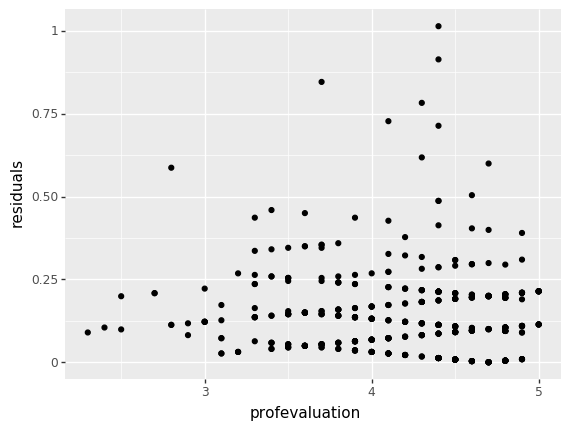

<ggplot: (-9223363290908692757)>

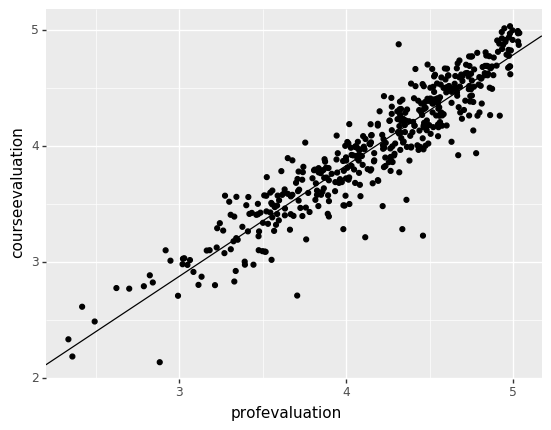

<ggplot: (8745945939534)>

['profevaluation', 0.1446865210920292]

In [90]:
params = list(df.columns)
params.remove(ocena)
params.remove("residuals")
tests=[]
wsks=[]
for test in params:
    results = smf.ols(ocena +"~"+test, data=dane).fit()
    wyn=results.params
    df=dane
    df['y_pred']=results.predict()
    df['residuals']=abs(df[ocena]-df['y_pred'])
    wsk=(df['residuals'].sum()/df['residuals'].count())
    wsks.append(wsk)
    tests.append(test)
    if wsk<0.44:
        fig3_res=(p9.ggplot(p9.aes(x=test,y='residuals'),data=dane)
          +p9.geom_point())
        display(fig3_res)
        fig1=(p9.ggplot(p9.aes(x=test,y=ocena),data=dane)
          +p9.geom_jitter(width=0.1)
          +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn[test])))
        display(fig1)
    
[tests[wsks.index(min(wsks))], min(wsks)]

## sprawdzenie która para parametrów ma najmnijesze residua przy predykcji 

In [82]:
params = list(df.columns)
params.remove(ocena)
params.remove("residuals")
params.remove("y_pred")
tests=[]
wsks=[]
for test in params:
    for test2 in params:
        if test==test2 or test==ocena or test2==ocena or test=='residuals' or test2=='residuals':
            continue
    results = smf.ols(ocena +"~"+test + "+"+test2, data=dane).fit()
    wyn=results.params
    df=dane
    df['y_pred']=results.predict()
    df['residuals']=abs(df[ocena]-df['y_pred'])
    wsk=(df['residuals'].sum()/df['residuals'].count())
    wsks.append(wsk)
    tests.append(test+" + "+test2)
    
    #fig3_res=(p9.ggplot(p9.aes(x=test,y='residuals'),data=dane)
    #  +p9.geom_point())
    #display(fig3_res)
    #fig1=(p9.ggplot(p9.aes(x=test,y=ocena),data=dane)
    #  +p9.geom_jitter(width=0.1)
    #  +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn[test])))
    #display(fig1)
    
tests[wsks.index(min(wsks))]


'profevaluation + btystdaveneg'

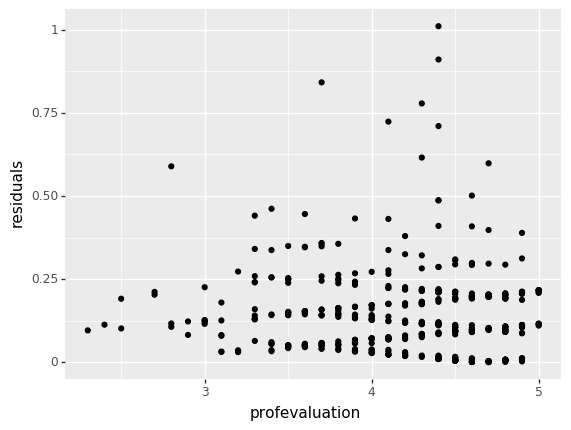

<ggplot: (8745940621078)>

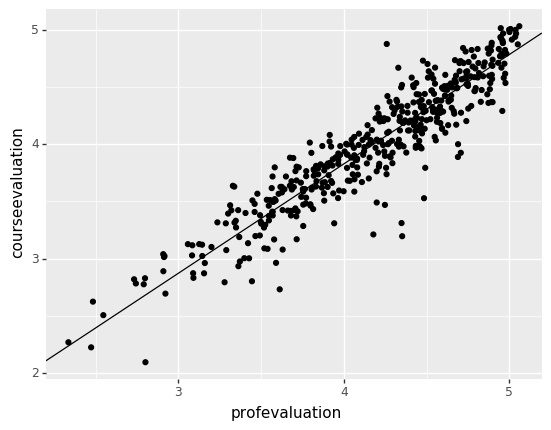

<ggplot: (-9223363290908767316)>

0.14482687210395898

,tenured,profnumber,minority,age,beautyf2upper,beautyflowerdiv,beautyfupperdiv,beautym2upper,beautymlowerdiv,beautymupperdiv,btystdave,btystdf2u,btystdfl,btystdfu,btystdm2u,btystdml,btystdmu,class1,class2,class3,class4,class5,class6,class7,class8,class9,class10,class11,class12,class13,class14,class15,class16,class17,class18,class19,class20,class21,class22,class23,class24,class25,class26,class27,class28,class29,class30,courseevaluation,didevaluation,female,formal,fulldept,lower,multipleclass,nonenglish,onecredit,percentevaluating,profevaluation,students,tenuretrack,blkandwhite,btystdvariance,btystdavepos,btystdaveneg,y_pred,residuals
tenured,1.000000,0.008552,-0.112777,0.395046,-0.116414,-0.071176,-0.278214,-0.113480,-0.093832,-0.142310,-0.165545,-0.116414,-0.071176,-0.280691,-0.113480,-0.093832,-0.142310,0.095192,-0.006144,-0.045662,-0.073970,0.038171,0.104392,-0.055586,-0.006144,-0.045662,-0.030734,-0.072296,0.019503,0.073575,0.019503,-0.006144,0.085050,0.112880,0.085050,0.104392,-0.114684,-0.143146,0.056666,0.095192,0.073575,0.019503,-0.034569,-0.006144,-0.008707,-0.006144,-0.012368,-0.057631,0.169608,-0.268479,0.232144,0.053244,-0.126381,0.038577,-0.078267,-0.273142,-0.107253,-0.071924,0.176054,0.583441,0.027564,-0.010820,-0.129705,-0.160310,-0.070814,-0.108279
profnumber,0.008552,1.000000,0.033525,0.078193,0.081561,-0.002293,-0.039370,0.069226,0.032062,0.123640,0.054353,0.081561,-0.002293,-0.037918,0.069226,0.032062,0.123640,0.028007,-0.093324,-0.189080,-0.278636,-0.065172,-0.108140,0.105537,-0.051377,-0.137810,-0.098990,0.024127,-0.026746,-0.002255,-0.041440,-0.034598,-0.032050,-0.053487,-0.045638,-0.029609,0.015080,-0.048230,-0.000916,0.015080,-0.009113,-0.024787,-0.115891,-0.089728,0.132714,0.091242,0.187303,0.019860,0.024911,-0.064894,0.061124,-0.145312,0.459876,-0.268496,0.054686,0.203350,-0.056252,-0.032367,0.030963,0.026793,0.334768,0.078093,0.239911,-0.170299,-0.031127,-0.026341
minority,-0.112777,0.033525,1.000000,-0.103120,0.084787,-0.095778,0.122271,0.031403,-0.093377,0.120509,0.033060,0.084787,-0.095778,0.120412,0.031403,-0.093377,0.120509,-0.041846,-0.026380,0.138988,0.011787,0.030231,-0.045890,-0.037388,0.069040,-0.053106,-0.041846,-0.026380,-0.032343,-0.032343,0.123646,-0.026380,0.097850,0.104227,0.097850,0.009441,0.079246,0.258177,-0.062479,-0.041846,-0.032343,-0.032343,-0.032343,-0.026380,0.097850,-0.026380,0.090965,-0.076655,-0.093227,0.114642,-0.027623,0.137785,0.136129,0.175785,0.292186,0.247490,0.142359,-0.075824,-0.096993,0.061896,-0.096671,0.067205,-0.000938,0.062338,-0.076399,0.096993
age,0.395046,0.078193,-0.103120,1.000000,-0.238958,-0.109086,-0.417802,-0.083685,-0.283876,-0.331621,-0.297893,-0.238958,-0.109086,-0.421598,-0.083685,-0.283876,-0.331621,-0.070050,-0.079810,-0.142049,-0.107779,-0.010630,0.060087,-0.077363,-0.032724,-0.062493,0.107076,-0.103352,0.104203,0.120697,-0.011257,-0.029361,0.020354,0.121910,0.058487,0.149798,-0.006029,-0.005294,-0.069540,0.051590,0.049222,0.016233,-0.112972,-0.066357,0.072787,0.061446,0.108466,-0.051696,-0.030461,-0.285088,0.188307,0.080940,-0.091463,0.009641,-0.002055,-0.025277,-0.108253,-0.107032,-0.012626,-0.098865,0.013866,-0.000913,-0.266726,-0.250823,-0.105288,-0.087276
beautyf2upper,-0.116414,0.081561,0.084787,-0.238958,1.000000,0.641927,0.648152,0.513062,0.535983,0.649640,0.811506,1.000000,0.641927,0.641717,0.513062,0.535983,0.649640,0.165129,-0.023321,0.018822,-0.021940,-0.033053,-0.097406,-0.102510,-0.023321,-0.030506,-0.156196,-0.006986,0.031492,0.018140,0.071549,-0.006986,-0.102510,0.021977,0.036404,-0.097406,-0.021447,0.062603,0.004558,0.009649,0.004787,-0.035270,0.031492,-0.023321,0.152165,0.025685,0.175030,0.164431,0.140370,0.206790,0.113750,0.168826,0.000973,0.021340,0.067475,-0.108683,0.176414,0.164268,0.087050,0.079641,0.272844,-0.184272,0.740895,0.667134,0.159463,0.061190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [79]:
results = smf.ols(ocena +"~ profevaluation + btystdaveneg", data=dane).fit()
wyn=results.params
df=dane
df['y_pred']=results.predict()
df['residuals']=abs(df[ocena]-df['y_pred'])

fig3_res=(p9.ggplot(p9.aes(x="profevaluation",y='residuals'),data=dane)
  +p9.geom_point())
display(fig3_res)
fig1=(p9.ggplot(p9.aes(x="profevaluation",y=ocena),data=dane)
  +p9.geom_jitter(width=0.1)
  +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn["profevaluation"])))
display(fig1)
wyn=results.params
df=dane
df['y_pred']=results.predict()
df['residuals']=abs(df[ocena]-df['y_pred'])
wsk=(df['residuals'].sum()/df['residuals'].count())
display(wsk)

display(df.corr())

## Sprawdzenie regresji złożenej

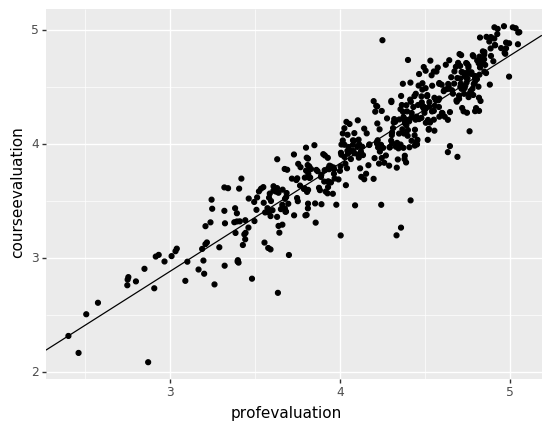

<ggplot: (-9223363290914154545)>

0.14506807676507263

In [78]:
results = smf.ols(ocena +"~profevaluation + btystdaveneg + profevaluation * btystdaveneg", data=dane).fit()
wyn=results.params

fig1=(p9.ggplot(p9.aes(x="profevaluation",y=ocena),data=dane)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn["profevaluation"])))
display(fig1)

wyn=results.params
df=dane
df['y_pred']=results.predict()
df['residuals']=abs(df[ocena]-df['y_pred'])
wsk=(df['residuals'].sum()/df['residuals'].count())
display(wsk)

Z podanych danych nie można predykować oceny kursu, jedynym parametrem zdolnym do predykcji jest profevaluation, co wynika z faktu, że studenci jednakowo oceniają prowoadzącego i przedmiot. 